In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad

1.666666666666735e-05 1.0792000544336891e-11


Text(0.5, 1.0, 'H= 75 km/s/Mpc')

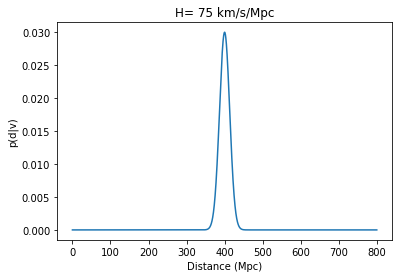

In [354]:
#PART A

sig = 1e3
mu = 3e4
H = 75

A = 1/np.sqrt(2*np.pi*sig**2) #constant in front of gaussian

def num(x): #numerator to integrate
    return (A/800)*np.exp( -((H*x - mu)**2)/ (2*sig**2))

denom, err = quad(num,0,800) #integrate numerator (this is denominator)
print(denom, err)

ys = lambda x: num(x)/denom

xpts = np.linspace(0,800,1e4) #make x points and plot
plt.plot(xpts,ys(xpts))
plt.xlabel('Distance (Mpc)')
plt.ylabel('p(d|v)')
plt.title('H= 75 km/s/Mpc')

In [358]:
#PART B

def CDFa(x): #creating cumulative distribution function
    return quad(ys, 0,x)[0]

yBE = [] 
for i in xpts: #creating list of plotted points to find mode below
    yBE.append(ys(i))

for i in xpts: #Find point in CDF that corresponds to lowest 16% of dist
    if CDFa(i) >= .16:
        print('Lower bound of 68% CI is: ',i,' Mpc')
        break

for i in xpts: #Same as above for highest 84% of dist
    if CDFa(i) >= .84:
        print('Upper bound of 68% CI is: ',i,' Mpc')
        break

m = yBE.index(max(yBE))#finding maximum of probability distribution
print('Best estimator is: Mode=',xpts.tolist()[m], ' Mpc')

Lower bound of 68% CI is:  386.75867586758676  Mpc
Upper bound of 68% CI is:  413.32133213321333  Mpc
Best estimator is: Mode= 399.9599959996  Mpc


1.8368333332515972e-05 1.3185210470178896e-08


Text(0.5, 1.0, 'Uniform priors for H and d')

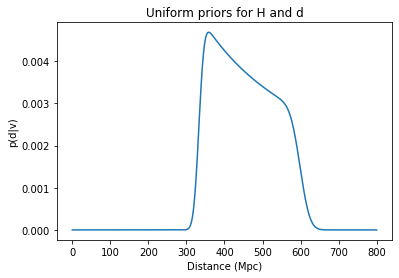

In [359]:
#PART C

sig = 1e3
mu = 3e4

A = 1/np.sqrt(2*np.pi*sig**2)
Hpri = 1/40 #flat H prior
Xpri = 1/800 #flat d prior

def gauss(H,x): #integrand for denominator
    return Xpri*Hpri*A*np.exp( -((H*x - mu)**2)/ (2*sig**2))


denom, err = dblquad(gauss,0,800, lambda x: 50, lambda x: 90) #double integration
print(denom, err)


def numerator(x): #numerator as function of x
    func = lambda H: A*np.exp( -((H*x - mu)**2)/ (2*sig**2))*Xpri*Hpri
    num, err2 = quad(func, 50,90)
    return num


ypts = [] #making y points for prob(x|v)
for i in xpts:
    ypts.append(numerator(i)/denom) 

plt.plot(xpts,ypts)
plt.xlabel('Distance (Mpc)')
plt.ylabel('p(d|v)')
plt.title('Uniform priors for H and d')

In [362]:
#PART D

ys = lambda x: numerator(x)/denom #making cumulative distribution function
def CDFc(x):
    return quad(ys, 0,x)[0]

for i in xpts: #Finding lower bound of CI
    if CDFc(i) >= .16:
        print('Lower bound of 68% CI is: ',i,' Mpc')
        break

for i in xpts: #Finding upper bound of CI
    if CDFc(i) >= .84:
        print('Upper bound of 68% CI is: ',i,' Mpc')
        break

weights= lambda x: x*numerator(x)/denom #finding expectation value
mean = quad(weights,0,800)

print('Best estimator is: Mean=',mean[0],' Mpc')

Lower bound of 68% CI is:  366.03660366036604  Mpc


/Users/maxmckie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  """


Upper bound of 68% CI is:  545.8945894589459  Mpc
Best estimator is: Mean= 453.67934123049673  Mpc


1.890330595105745e-05 7.069192154215825e-09


Text(0.5, 1.0, "Jeffrey's prior for H")

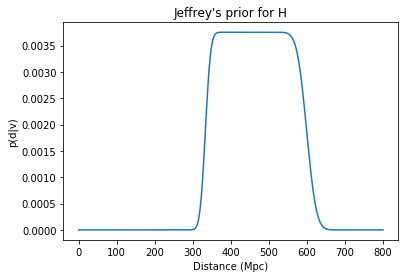

In [363]:
#PART E

sig = 1e3
mu = 3e4

A = 1/np.sqrt(2*np.pi*sig**2)
HHpri = 1/np.log(90/50) #Jeffrey's H prior multiplied by H
Xpri = 1/800 #still flat d prior

def gauss(H,x): #denominator
    return Xpri*HHpri*(1/H)*A*np.exp( -(1/2)*((H*x - mu)/sig)**2)


denom, err = dblquad(gauss,0,800, lambda x: 50, lambda x: 90) #double integration of denominator
print(denom, err)


def numerator(x): #numerator as function of x
    func = lambda H: A*np.exp( -(1/2)*((H*x - mu)/sig)**2)*Xpri*(1/H)*HHpri
    num, err2 = quad(func, 50,90)
    return num


ypts = [] #getting points for p(d|v)
for i in xpts:
    ypts.append(numerator(i)/denom)

plt.plot(xpts,ypts)
plt.xlabel('Distance (Mpc)')
plt.ylabel('p(d|v)')
plt.title("Jeffrey's prior for H")

In [365]:
#PART F

ys = lambda x: numerator(x)/denom #creating CDF
def CDFe(x):
    return quad(ys, 0,x)[0]

for i in xpts: #Finding lower bound of CI
    if CDFe(i) >= .16:
        print('Lower bound of 68% CI is: ',i,' Mpc')
        break

for i in xpts: #Finding upper bound of CI
    if CDFe(i) >= .84:
        print('Upper bound of 68% CI is: ',i,' Mpc')
        break

weights= lambda x: x*numerator(x)/denom #calculating mean
mean = quad(weights,0,800)
print('Best estimator: Mean=',mean[0],' Mpc')

Lower bound of 68% CI is:  375.63756375637564  Mpc
Upper bound of 68% CI is:  556.8556855685569  Mpc
Best estimator: Mean= 466.66671175850985  Mpc


/Users/maxmckie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


1.6891266951096314e-05
1.8474628402733928e-05


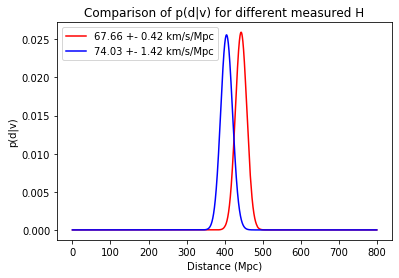

In [366]:
#PART G

sigv = 1e3
muv = 3e4

sigH1 = 1.42 #sigma and mu corresponding to measurements 1 and 2 in the
muH1 = 74.03 # problem statement
sigH2 = .42
muH2 = 67.66

A = 1/(sigv*np.sqrt(2*np.pi))  #constants in front of gaussian distribution
B1 = 1/(sigH1*np.sqrt(2*np.pi))
B2 = 1/(sigH2*np.sqrt(2*np.pi))

Xpri = 1/800 #flat x prior (I used x instead of d)


def Hgauss1(H,x): #integrand for first denominator
    HHpri = B1*np.exp( -(1/2)*((H-muH1)/sigH1)**2)
    den1 = Xpri*HHpri*A*np.exp( -(1/2)*((H*x - muv)/sigv)**2)
    return den1


denom1, err1 = dblquad(Hgauss1,0,800, lambda x: 50, lambda x: 90) #double integral of 1st denominator
print(denom1)


def numerator1(x): #integrating H out of numerator so it is only function of x
    func = lambda H: A*B1*Xpri*np.exp( -(1/2)*((H*x - mu)/sig)**2) * np.exp( -(1/2)*((H-muH1)/sigH1)**2)
    num1 = quad(func, 50,90)[0]
    return num1


ypts1 = [] #making points to plot on y axis for 1st distribution
for i in xpts:
    ypts1.append(numerator1(i)/denom1)

    


def Hgauss2(H,x): #integrand for second denominator
    HHpri = B2*np.exp( -(1/2)*((H-muH2)/sigH2)**2)
    den2 = Xpri*HHpri*A*np.exp( -(1/2)*((H*x - muv)/sigv)**2)
    return den2


denom2, err2 = dblquad(Hgauss2,0,800, lambda x: 50, lambda x: 90) #double integral of 2nd denominator
print(denom2)


def numerator2(x): #integrating H out of numerator so it is only function of x
    func = lambda H: A*B2*Xpri*np.exp( -(1/2)*((H*x - mu)/sig)**2) * np.exp( -(1/2)*((H-muH2)/sigH2)**2)
    num2, err2 = quad(func, 50,90)
    return num2


ypts2 = [] #making points to plot on y axis for 2nd distribution
for i in xpts:
    ypts2.append(numerator2(i)/denom)

plt.plot(xpts,ypts2,'r',label = '67.66 +- 0.42 km/s/Mpc')  
plt.plot(xpts,ypts1, 'b',label='74.03 +- 1.42 km/s/Mpc' )
plt.xlabel('Distance (Mpc)')
plt.ylabel('p(d|v)')
plt.title('Comparison of p(d|v) for different measured H')
plt.legend()
plt.show()

In [368]:
#PART H

ys1 = lambda x: numerator1(x)/denom1 #making CDFs for 1 and 2
def CDFg1(x):
    return quad(ys1, 0,x)[0]

ys2 = lambda x: numerator2(x)/denom2
def CDFg2(x):
    return quad(ys2, 0,x)[0]

#finding CI bounds for 1 and 2

for i in xpts:
    if CDFg1(i)>= .16:
        print('Lower bound of 68% CI for blue dist.: ',i,' Mpc')
        break
        
for i in xpts:
    if CDFg1(i)>= .84:
        print('Upper bound of 68% CI for blue dist.: ',i,' Mpc')
        break
        
for i in xpts:
    if CDFg2(i)>= .16:
        print('Lower bound of 68% CI for red dist.: ',i,' Mpc')
        break
        
for i in xpts:
    if CDFg2(i)>= .84:
        print('Upper bound of 68% CI for red dist.: ',i,' Mpc')
        break
        
weights1= lambda x: x*numerator1(x)/denom1 #Finding expectation values for
weights2= lambda x: x*numerator2(x)/denom2 #  best estimators
mean1 = quad(weights1,0,800)
mean2 = quad(weights2,0,800)
print('Best estimator of red curve: Mean= ',mean2[0],' Mpc')
print('Best estimator of blue curve: Mean= ',mean1[0],' Mpc')

Lower bound of 68% CI for blue dist.:  390.03900390039007  Mpc
Upper bound of 68% CI for blue dist.:  421.0821082108211  Mpc


/Users/maxmckie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  if __name__ == '__main__':


Lower bound of 68% CI for red dist.:  428.52285228522857  Mpc
Upper bound of 68% CI for red dist.:  458.4458445844585  Mpc
Best estimator of red curve: Mean=  443.3897883265897  Mpc
Best estimator of blue curve: Mean=  405.539841809249  Mpc


/Users/maxmckie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


In [ ]:
The 68% CI for d given the 2 different measurements of H do not quite agree but the bounds are very close.

From the way the question was asked, I feel like they are supposed to agree.

My guess as to why they do not agree is because of rounding errors in the scipy.integrate.quad function (see the
    roundoff tolerance caution statements in red above). I'm not sure if this is something I could have avoided 
    using a different function to integrate but hey, if they were supposed to agree I wasn't too far off right?